In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE,SelectFromModel,SelectKBest,chi2,VarianceThreshold
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import xgboost as xg 
import matplotlib.dates as mdates
from datetime import datetime

In [2]:
df=pd.read_csv('Interest_Rate.csv')
df

,Month,Year,CPI,Money_Supply(M2),Inflation_rate,Exchange_rate,GDP_Per_Capita,Interest_rate
0,1,2010,139.65,3279.91,8.99,69.21,972.91,4.50
1,2,2010,140.03,3343.71,9.06,69.29,972.91,6.50
2,3,2010,140.09,3375.79,8.77,69.25,972.91,6.50
3,4,2010,140.02,3430.41,8.53,69.26,972.91,6.50
4,5,2010,140.71,3522.26,8.66,69.30,972.91,6.50
...,...,...,...,...,...,...,...,...
127,8,2020,282.11,14154.12,5.68,84.84,1619.78,4.75
128,9,2020,288.12,14262.05,5.97,84.80,1619.78,4.75
129,10,2020,290.91,14397.28,6.44,84.80,1619.78,4.75
130,11,2020,288.71,14539.60,5.52,84.80,1619.78,4.75


In [3]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Month,132.0,6.500000,3.465203,1.00,3.7500,6.500,9.2500,12.00
Year,132.0,2015.000000,3.174324,2010.00,2012.0000,2015.000,2018.0000,2020.00
CPI,132.0,213.591136,42.105828,139.65,180.8050,212.080,247.8900,290.91
Money_Supply(M2),132.0,8194.491348,3192.041672,3279.91,5470.8900,7961.480,10568.6625,14786.85
Inflation_rate,132.0,7.011136,2.312371,4.96,5.5475,6.060,7.4575,16.00
Exchange_rate,132.0,79.186212,4.461843,69.21,77.7500,78.565,83.1625,84.95
GDP_Per_Capita,132.0,1276.229091,212.891919,972.91,1078.2900,1248.450,1481.1800,1619.78
Interest_rate,132.0,6.634470,0.808120,4.50,6.0000,6.750,7.2500,7.75


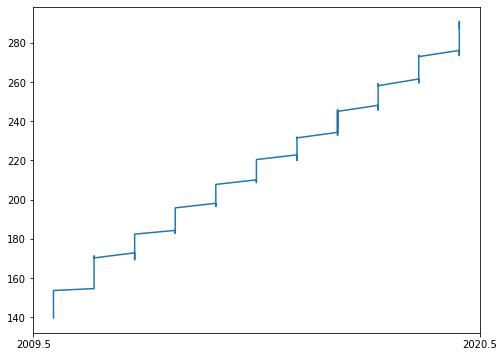

In [5]:
fig, ax = plt.subplots(figsize=(8, 6))

half_year_locator = mdates.MonthLocator(interval=2)
ax.xaxis.set_major_locator(half_year_locator) # Locator for major axis only.

ax.plot(df['Year'], df['CPI']);

In [4]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [ ]:
'CPI','Money_Supply(M2)','Inflation_rate','Exchange_rate','GDP_Per_Capita'

In [8]:
plt.style.use('bmh')

[Text(0, 0, '2010'),
 Text(12, 0, '2011'),
 Text(24, 0, '2012'),
 Text(36, 0, '2013'),
 Text(48, 0, '2014'),
 Text(60, 0, '2015'),
 Text(72, 0, '2016'),
 Text(84, 0, '2017'),
 Text(96, 0, '2018'),
 Text(108, 0, '2019'),
 Text(120, 0, '2020')]

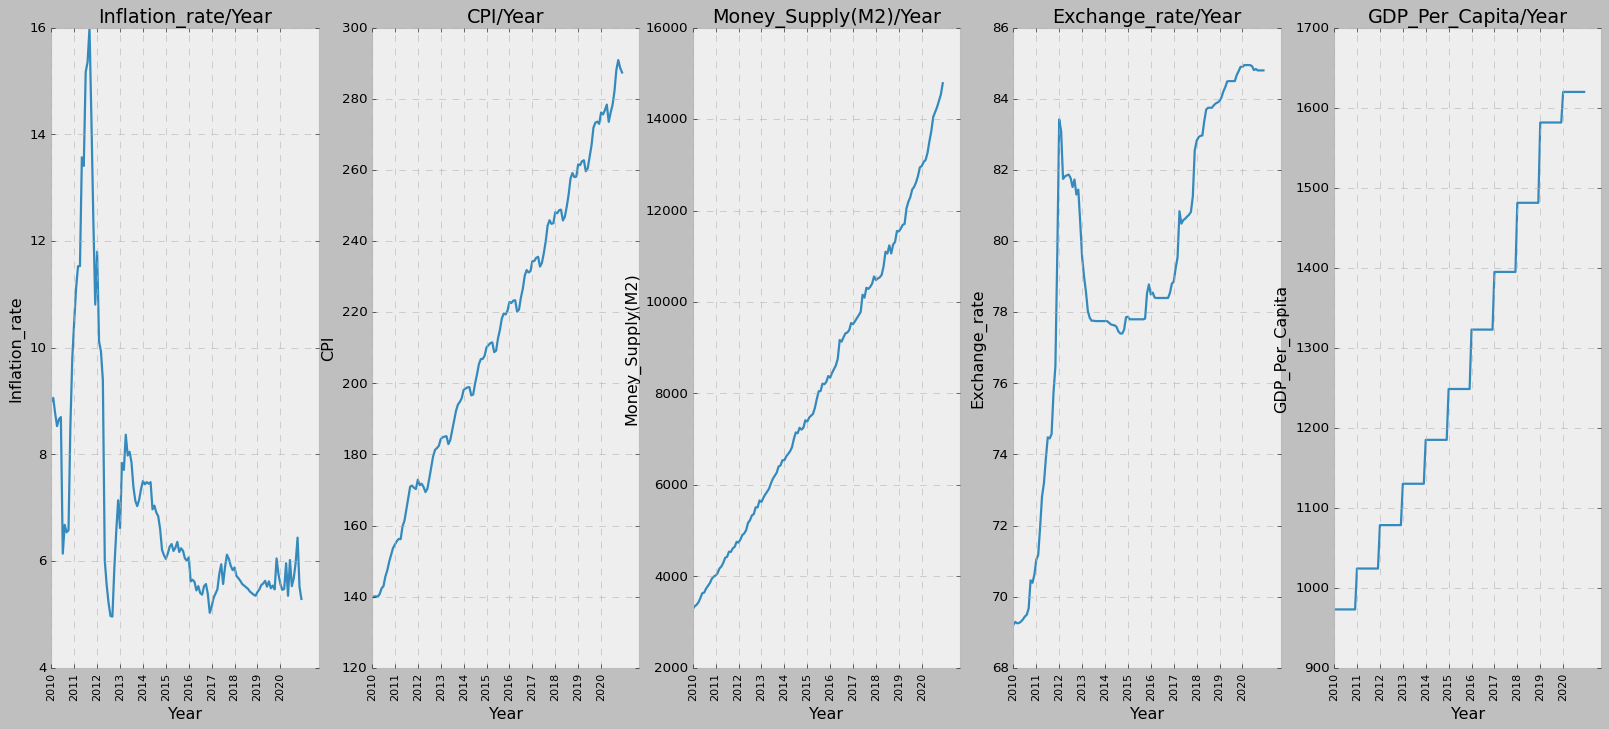

In [54]:
fig, ax = plt.subplots(1,5,figsize=(25,10))
ax[0].plot(df['Inflation_rate'])
ax[1].plot(df['CPI'])
ax[2].plot(df['Money_Supply(M2)'])
ax[3].plot(df['Exchange_rate'])
ax[4].plot(df['GDP_Per_Capita'])
ax[0].set_title('Inflation_rate/Year')
ax[1].set_title('CPI/Year')
ax[2].set_title('Money_Supply(M2)/Year')
ax[3].set_title('Exchange_rate/Year')
ax[4].set_title('GDP_Per_Capita/Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Inflation_rate')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('CPI')
ax[2].set_xlabel('Year')
ax[2].set_ylabel('Money_Supply(M2)')
ax[3].set_xlabel('Year')
ax[3].set_ylabel('Exchange_rate')
ax[4].set_xlabel('Year')
ax[4].set_ylabel('GDP_Per_Capita')
axes =plt.axes(ax[0])
axes.set_xticks([0,12,24,36,48,60,72,84,96,108,120])
x_ticks_labels = ['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']
axes.set_xticklabels(x_ticks_labels, rotation='vertical', fontsize=10)
axes =plt.axes(ax[1])
axes.set_xticks([0,12,24,36,48,60,72,84,96,108,120])
x_ticks_labels = ['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']
axes.set_xticklabels(x_ticks_labels, rotation='vertical', fontsize=10)
axes =plt.axes(ax[2])
axes.set_xticks([0,12,24,36,48,60,72,84,96,108,120])
x_ticks_labels = ['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']
axes.set_xticklabels(x_ticks_labels, rotation='vertical', fontsize=10)
axes =plt.axes(ax[3])
axes.set_xticks([0,12,24,36,48,60,72,84,96,108,120])
x_ticks_labels = ['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']
axes.set_xticklabels(x_ticks_labels, rotation='vertical', fontsize=10)
axes =plt.axes(ax[4])
axes.set_xticks([0,12,24,36,48,60,72,84,96,108,120])
x_ticks_labels = ['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']
axes.set_xticklabels(x_ticks_labels, rotation='vertical', fontsize=10)

<ipython-input-17-02eca234b6fe>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes = plt.axes()


[Text(0, 0, '2010'),
 Text(12, 0, '2011'),
 Text(24, 0, '2012'),
 Text(36, 0, '2013'),
 Text(48, 0, '2014'),
 Text(60, 0, '2015'),
 Text(72, 0, '2016'),
 Text(84, 0, '2017'),
 Text(96, 0, '2018'),
 Text(108, 0, '2019'),
 Text(120, 0, '2020')]

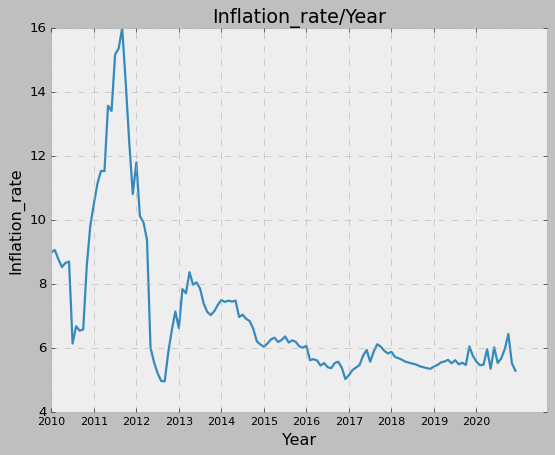

In [17]:
df['Inflation_rate'].plot(figsize=(8,6),title='Inflation_rate/Year')#marker='o'
plt.xlabel('Year')
plt.ylabel('Inflation_rate')
axes = plt.axes()
axes.set_xticks([0,12,24,36,48,60,72,84,96,108,120])
x_ticks_labels = ['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']
axes.set_xticklabels(x_ticks_labels, rotation='horizontal', fontsize=10)
#plt.savefig("Interest_rate1.png")

<ipython-input-19-c0f715c1a280>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes = plt.axes()


[Text(0, 0, '2010'),
 Text(12, 0, '2011'),
 Text(24, 0, '2012'),
 Text(36, 0, '2013'),
 Text(48, 0, '2014'),
 Text(60, 0, '2015'),
 Text(72, 0, '2016'),
 Text(84, 0, '2017'),
 Text(96, 0, '2018'),
 Text(108, 0, '2019'),
 Text(120, 0, '2020')]

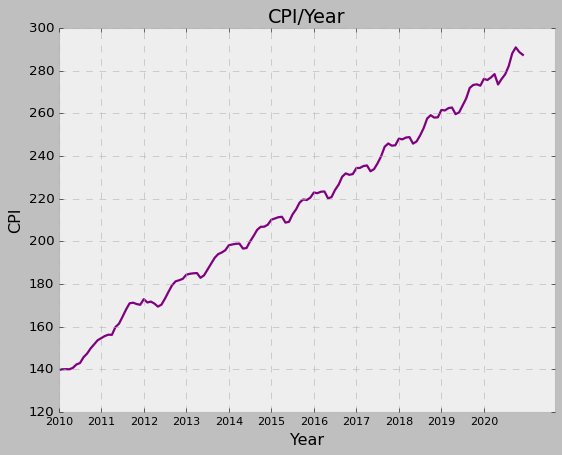

In [19]:
df['CPI'].plot(figsize=(8,6),color='purple',title='CPI/Year')
plt.xlabel('Year')
plt.ylabel('CPI')
axes = plt.axes()
axes.set_xticks([0,12,24,36,48,60,72,84,96,108,120])
x_ticks_labels = ['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']
axes.set_xticklabels(x_ticks_labels, rotation='horizontal', fontsize=10)
#plt.savefig("Interest_rate1.png")

<ipython-input-20-0ae1b649f73c>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes = plt.axes()


[Text(0, 0, '2010'),
 Text(12, 0, '2011'),
 Text(24, 0, '2012'),
 Text(36, 0, '2013'),
 Text(48, 0, '2014'),
 Text(60, 0, '2015'),
 Text(72, 0, '2016'),
 Text(84, 0, '2017'),
 Text(96, 0, '2018'),
 Text(108, 0, '2019'),
 Text(120, 0, '2020')]

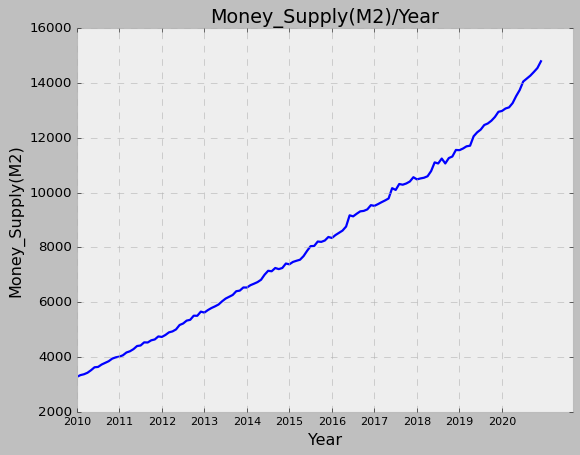

In [20]:
df['Money_Supply(M2)'].plot(figsize=(8,6),color='blue',title='Money_Supply(M2)/Year')
plt.xlabel('Year')
plt.ylabel('Money_Supply(M2)')
axes = plt.axes()
axes.set_xticks([0,12,24,36,48,60,72,84,96,108,120])
x_ticks_labels = ['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']
axes.set_xticklabels(x_ticks_labels, rotation='horizontal', fontsize=10)

<ipython-input-55-1968c33320ec>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes = plt.axes()


[Text(0, 0, '2010'),
 Text(12, 0, '2011'),
 Text(24, 0, '2012'),
 Text(36, 0, '2013'),
 Text(48, 0, '2014'),
 Text(60, 0, '2015'),
 Text(72, 0, '2016'),
 Text(84, 0, '2017'),
 Text(96, 0, '2018'),
 Text(108, 0, '2019'),
 Text(120, 0, '2020')]

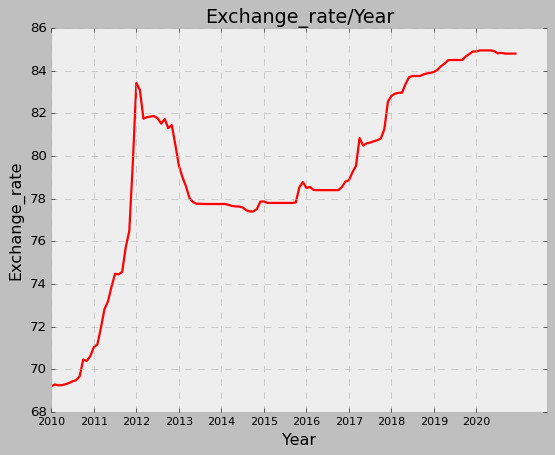

In [55]:
df['Exchange_rate'].plot(figsize=(8,6),color='red',title='Exchange_rate/Year')
plt.xlabel('Year')
plt.ylabel('Exchange_rate')
axes = plt.axes()
axes.set_xticks([0,12,24,36,48,60,72,84,96,108,120])
x_ticks_labels = ['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']
axes.set_xticklabels(x_ticks_labels, rotation='horizontal', fontsize=10)

<ipython-input-59-c382ef2ad18c>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes = plt.axes()


[Text(0, 0, '2010'),
 Text(12, 0, '2011'),
 Text(24, 0, '2012'),
 Text(36, 0, '2013'),
 Text(48, 0, '2014'),
 Text(60, 0, '2015'),
 Text(72, 0, '2016'),
 Text(84, 0, '2017'),
 Text(96, 0, '2018'),
 Text(108, 0, '2019'),
 Text(120, 0, '2020')]

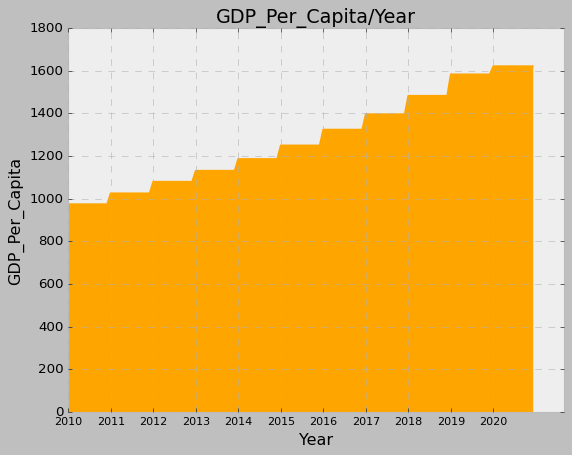

In [59]:
df['GDP_Per_Capita'].plot.area(figsize=(8,6),color='orange',title='GDP_Per_Capita/Year')
plt.xlabel('Year')
plt.ylabel('GDP_Per_Capita')
axes = plt.axes()
axes.set_xticks([0,12,24,36,48,60,72,84,96,108,120])
x_ticks_labels = ['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']
axes.set_xticklabels(x_ticks_labels, rotation='horizontal', fontsize=10)

<AxesSubplot:xlabel='Interest_rate', ylabel='Year'>

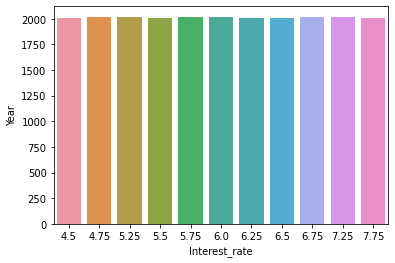

In [4]:
sns.barplot(x='Interest_rate',y='Year',data=df)

<ipython-input-9-d9c392e1832a>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes = plt.axes()


[Text(0, 0, '2010'),
 Text(12, 0, '2011'),
 Text(24, 0, '2012'),
 Text(36, 0, '2013'),
 Text(48, 0, '2014'),
 Text(60, 0, '2015'),
 Text(72, 0, '2016'),
 Text(84, 0, '2017'),
 Text(96, 0, '2018'),
 Text(108, 0, '2019'),
 Text(120, 0, '2020')]

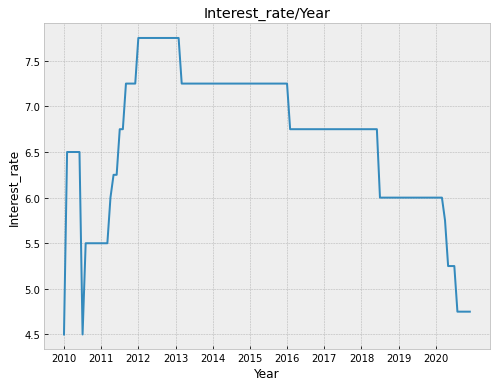

In [9]:
df['Interest_rate'].plot(figsize=(8,6),title='Interest_rate/Year')
plt.xlabel('Year')
plt.ylabel('Interest_rate')
axes = plt.axes()
axes.set_xticks([0,12,24,36,48,60,72,84,96,108,120])
x_ticks_labels = ['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']
axes.set_xticklabels(x_ticks_labels, rotation='horizontal', fontsize=10)

In [ ]:
'CPI','Money_Supply(M2)','Inflation_rate','Exchange_rate','GDP_Per_Capita'

In [51]:
x=df.iloc[:,[0,1,2,3,4,5,6]]
y=df.iloc[:, 7]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state = 15)

# svm

In [103]:
x=df.iloc[:,[0,1,2,3,4,5,6]]
y=df.iloc[:, 7]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state = 16)#Shuffle-random_state = 10

In [136]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf',C=70, gamma=0.000001, epsilon=.0001)#C=55, gamma=0.00001, epsilon=.001
svr.fit(x_train, y_train)
y_pred = svr.predict(x_test)
y_pred

array([5.90993412, 6.73575274, 7.23918241, 5.59191967, 6.02910928,
       6.30855908, 6.28999389, 6.72863325, 7.25059498, 7.24074285,
       5.63908273, 6.75157649, 7.27082877, 7.7457401 , 7.74501633,
       5.48118068, 7.25564601, 4.70624698, 7.20446562, 6.74633116,
       7.25730681, 5.85957096, 6.01317065, 7.5120166 , 7.26184314,
       7.257607  , 5.99702363])

In [137]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('MAE : ',metrics.mean_absolute_error(y_test,y_pred))
print('MSE : ',metrics.mean_squared_error(y_test,y_pred))
print('RMSE : ',np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))
accuracy = r2_score(y_test,y_pred)
'Accuracy: {}%'.format(int(round(accuracy*100)))

MAE :  0.0777568249895489
MSE :  0.025963800560987387
RMSE :  0.27884910792317213


'Accuracy: 96%'

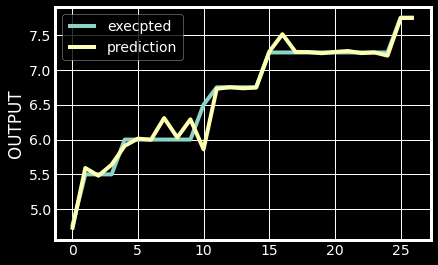

In [138]:
def chart_regression(pred,y,sort=True):
    t=pd.DataFrame({'pred':pred,'y':y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    plt.plot(t['y'].tolist(),label='execpted')
    plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('OUTPUT')
    plt.legend()
    plt.show()
y_test = np.array(list(y_test))
y_pred = np.array(y_pred)
chart_regression(y_pred.flatten(),y_test)

# RF

In [270]:
x=df.iloc[:,[0,1,2,3,4,5,6]]
y=df.iloc[:, 7]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state = 16)#Shuffle-random_state = 10

In [276]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=20)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
y_pred

array([5.9625, 6.75  , 7.225 , 5.5625, 6.    , 6.6   , 6.225 , 6.825 ,
       7.275 , 7.275 , 5.05  , 6.75  , 7.25  , 7.7   , 7.75  , 5.1   ,
       7.275 , 4.825 , 7.225 , 6.75  , 7.25  , 6.2   , 6.    , 7.25  ,
       7.25  , 7.25  , 6.    ])

In [277]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('MAE : ',metrics.mean_absolute_error(y_test,y_pred))
print('MSE : ',metrics.mean_squared_error(y_test,y_pred))
print('RMSE : ',np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))
accuracy = r2_score(y_test,y_pred)
'Accuracy: {}%'.format(int(round(accuracy*100)))

MAE :  0.08888888888888893
MSE :  0.03278935185185185
RMSE :  0.298142396999972


'Accuracy: 95%'

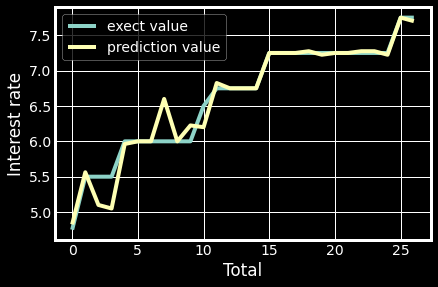

In [278]:
def chart_regression(pred,y,sort=True):
    t=pd.DataFrame({'pred':pred,'y':y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    plt.plot(t['y'].tolist(),label='exect value')
    plt.plot(t['pred'].tolist(),label='prediction value')
    plt.ylabel('Interest rate')
    plt.xlabel('Total')
    plt.legend()
    plt.show()
y_test = np.array(list(y_test))
y_pred = np.array(y_pred)
chart_regression(y_pred.flatten(),y_test)

# DT

In [257]:
x=df.iloc[:,[0,1,2,3,4,5,6]]
y=df.iloc[:, 7]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state = 16)#Shuffle-random_state = 10

In [258]:
from sklearn.tree import DecisionTreeRegressor
tree_model = DecisionTreeRegressor(max_depth=250)
tree_model.fit(x_train, y_train)
y_pred = tree_model.predict(x_test)
y_pred


array([6.  , 6.75, 7.25, 5.5 , 6.  , 6.75, 6.  , 6.75, 7.25, 7.25, 5.5 ,
       6.75, 7.25, 7.75, 7.75, 5.5 , 7.25, 4.75, 7.25, 6.75, 7.25, 6.5 ,
       6.  , 7.25, 7.25, 7.25, 6.  ])

In [259]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('MAE : ',metrics.mean_absolute_error(y_test,y_pred))
print('MSE : ',metrics.mean_squared_error(y_test,y_pred))
print('RMSE : ',np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))
accuracy = r2_score(y_test,y_pred)
print(accuracy)
'Accuracy: {}%'.format(int(round(accuracy*100)))

MAE :  0.027777777777777776
MSE :  0.020833333333333332
RMSE :  0.16666666666666666
0.965216146578872


'Accuracy: 97%'

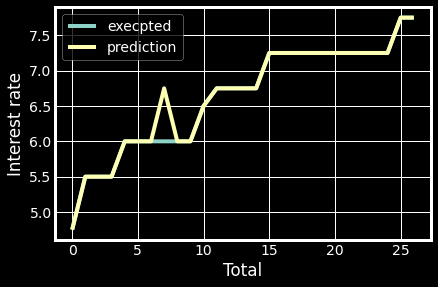

In [260]:
def chart_regression(pred,y,sort=True):
    t=pd.DataFrame({'pred':pred,'y':y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    plt.plot(t['y'].tolist(),label='execpted')
    plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('Interest rate')
    plt.xlabel('Total')
    plt.legend()
    plt.show()
y_test = np.array(list(y_test))
y_pred = np.array(y_pred)
chart_regression(y_pred.flatten(),y_test)

# ADA

In [19]:
x=df.iloc[:,[0,1,2,3,4,5,6,7]]
y=df.iloc[:, 8]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state = 15)#Shuffle-random_state = 10

In [20]:
from sklearn.ensemble import AdaBoostRegressor
regr = AdaBoostRegressor(n_estimators=150)
regr.fit(x, y)
y_pred =regr.predict(x_test)
y_pred

array([6.67934783, 5.525     , 7.21666667, 7.23      , 4.75      ,
       6.67982456, 5.9673913 , 7.25      , 7.25      , 6.67982456,
       5.9673913 , 5.9673913 , 6.67982456, 6.67934783, 7.21666667,
       7.69444444, 7.66666667, 7.23      , 5.9673913 , 6.67982456,
       5.5       , 6.67982456, 7.69444444, 6.67982456, 7.21153846,
       6.65725806])

In [21]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('MAE : ',metrics.mean_absolute_error(y_test,y_pred))
print('MSE : ',metrics.mean_squared_error(y_test,y_pred))
print('RMSE : ',np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))
accuracy = r2_score(y_test,y_pred)
print(accuracy)
'Accuracy: {}%'.format(int(round(accuracy*100)))

MAE :  0.04423485950270196
MSE :  0.002716507049617089
RMSE :  0.21032084894917563
0.994986051152106


'Accuracy: 99%'

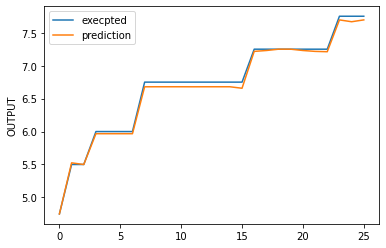

In [22]:
def chart_regression(pred,y,sort=True):
    t=pd.DataFrame({'pred':pred,'y':y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    plt.plot(t['y'].tolist(),label='execpted')
    plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('OUTPUT')
    plt.legend()
    plt.show()
y_test = np.array(list(y_test))
y_pred = np.array(y_pred)
chart_regression(y_pred.flatten(),y_test)

# Gradient

In [23]:
x=df.iloc[:,[0,1,2,3,4,5,6,7]]
y=df.iloc[:, 8]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state = 15)#Shuffle-random_state = 10

In [24]:
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor()
reg.fit(x_train, y_train)
y_pred =reg.predict(x_test)
y_pred

array([6.46078979, 5.49241189, 7.24868561, 7.24868561, 4.76658986,
       6.74400774, 5.99789763, 7.25155478, 7.25383841, 6.74312353,
       5.99789763, 6.01723311, 6.74406564, 6.34947157, 7.24956982,
       7.74753167, 7.26139925, 7.25155478, 5.99878185, 6.68872699,
       5.50239998, 6.74674034, 7.74873469, 6.74163082, 7.24956982,
       6.0152051 ])

In [25]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('MAE : ',metrics.mean_absolute_error(y_test,y_pred))
print('MSE : ',metrics.mean_squared_error(y_test,y_pred))
print('RMSE : ',np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))
accuracy = r2_score(y_test,y_pred)
print(accuracy)
'Accuracy: {}%'.format(int(round(accuracy*100)))

MAE :  0.07954784344564832
MSE :  0.03951346999683681
RMSE :  0.2820422724444836
0.9270686533300705


'Accuracy: 93%'

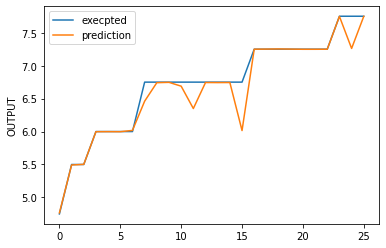

In [26]:
def chart_regression(pred,y,sort=True):
    t=pd.DataFrame({'pred':pred,'y':y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    plt.plot(t['y'].tolist(),label='execpted')
    plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('OUTPUT')
    plt.legend()
    plt.show()
y_test = np.array(list(y_test))
y_pred = np.array(y_pred)
chart_regression(y_pred.flatten(),y_test)

# XG

In [27]:
x=df.iloc[:,[0,1,2,3,4,5,6,7]]
y=df.iloc[:, 8]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state = 15)#Shuffle-random_state = 10

In [28]:
xgb_r = xg.XGBRegressor(objective ='reg:squarederror',n_estimators = 50, seed = 150) 
xgb_r.fit(x_train,y_train)
y_pred = xgb_r.predict(x_test)
y_pred

array([6.7450256, 5.5297484, 7.2498894, 7.2499466, 4.7495146, 6.7320414,
       5.9989295, 7.250202 , 7.2419534, 6.7457714, 5.9964957, 6.000198 ,
       6.7519875, 6.0326276, 7.250145 , 7.7499847, 7.266011 , 7.250145 ,
       5.9994626, 6.751073 , 5.500551 , 6.752564 , 7.702448 , 6.623051 ,
       7.250145 , 6.0062428], dtype=float32)

In [29]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('MAE : ',metrics.mean_absolute_error(y_test,y_pred))
print('MSE : ',metrics.mean_squared_error(y_test,y_pred))
print('RMSE : ',np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))
accuracy = r2_score(y_test,y_pred)
print(accuracy)
'Accuracy: {}%'.format(int(round(accuracy*100)))

MAE :  0.08451397602374737
MSE :  0.05083697321740251
RMSE :  0.29071287557269865
0.9061684808328625


'Accuracy: 91%'

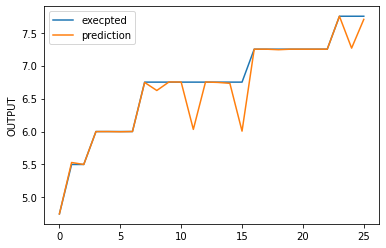

In [30]:
def chart_regression(pred,y,sort=True):
    t=pd.DataFrame({'pred':pred,'y':y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    plt.plot(t['y'].tolist(),label='execpted')
    plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('OUTPUT')
    plt.legend()
    plt.show()
y_test = np.array(list(y_test))
y_pred = np.array(y_pred)
chart_regression(y_pred.flatten(),y_test)